## Pair Programming Visualización I

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.
Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

In [146]:
import matplotlib.colors as mcolors

In [147]:
df_ataques = pd.read_csv("../Panda/2. datos_sincolumnas.csv")
df_ataques.head(2)

,Case Number,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [148]:
columnas_min = {col:col.lower().replace(" ","_") for col in df_ataques.columns}
df_ataques.rename(columns = columnas_min, inplace=True)

In [149]:
df_ataques.columns

Index(['case_number', 'unnamed:_0', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'time', 'species_',
       'href'],
      dtype='object')

In [150]:
# Borramos la columna unnamed:_0
df_ataques.drop(["unnamed:_0"], axis = 1, inplace = True)

In [151]:
# Se confirma que se haya borrado la columna
df_ataques.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [152]:
df_p=pd.DataFrame(df_ataques["sex_"].value_counts()).reset_index()
df_p.head()

,index,sex_
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1


In [153]:
df_p.rename(columns={"sex_":"cantidad"},inplace=True)
df_p.head()

,index,cantidad
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1


In [154]:
df_p.columns

Index(['index', 'cantidad'], dtype='object')

In [155]:
x= df_p["index"]
y = df_p["cantidad"]

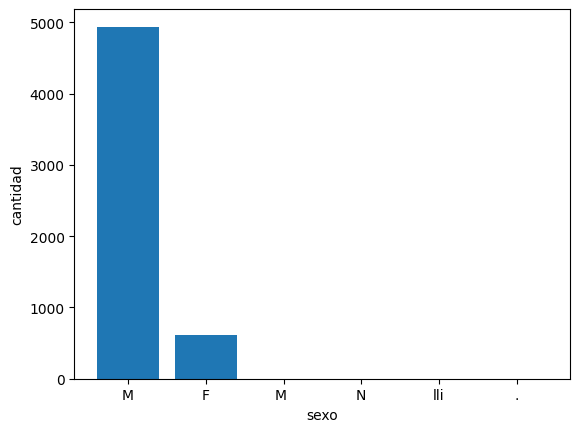

In [156]:
# Elaboramos una figura que muestra la frecuencia por categoría sexo
plt.figure()
plt.bar(x , y)
plt.xlabel("sexo")
plt.ylabel("cantidad")
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación

In [157]:
df_ataques.isnull().sum()

case_number       1
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [158]:
df_nulos= pd.DataFrame(df_ataques.isnull().sum()).reset_index()
df_nulos.head()

,index,0
0,case_number,1
1,year,0
2,type,4
3,country,40
4,area,408


In [159]:
df_nulos.rename(columns={0:"cantidad"},inplace=True)
df_nulos.head()

,index,cantidad
0,case_number,1
1,year,0
2,type,4
3,country,40
4,area,408


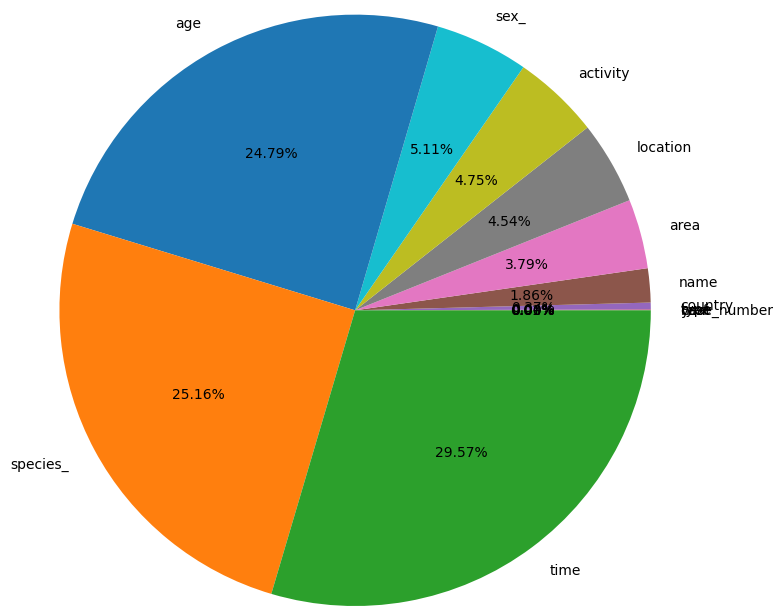

In [160]:
plt.figure()
df_nulos_ordenado = df_nulos.sort_values('cantidad')
plt.pie(df_nulos_ordenado["cantidad"], labels=df_nulos_ordenado["index"] ,autopct="%1.2f%%", radius=2)
plt.show()

**3**. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [161]:
# Identificamos las variables categóricas
df_ataques.describe(include="object").T 

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex_,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


In [162]:
df_ataques_cat=df_ataques.copy()
df_ataques_cat.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [163]:
#borramos las columnas que no son categóricas
for i in df_ataques_cat.columns: 
    if i not in df_ataques_cat.describe(include="object"):
        # print (i)
        df_ataques_cat.drop([i], axis = 1, inplace=True)
print(df_ataques_cat.columns)

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')


In [164]:
df_ataques_cat['case_number'].unique().size #probamos este código para una columna

6114

In [165]:
lista_val = []
for i in df_ataques_cat.columns:
    lista_val.append(df_ataques_cat[i].unique().size)
lista_val

[6114, 9, 202, 792, 4021, 1485, 5119, 7, 157, 367, 1530, 6099]

In [166]:
lista_col = []
for col in df_ataques_cat:
    #print(col)
    lista_col.append(col)
lista_col



['case_number',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex_',
 'age',
 'time',
 'species_',
 'href']

In [167]:
dic = (dict(zip(lista_col, lista_val))) 

In [168]:
df_cat = pd.DataFrame([[key, dic[key]] for key in dic.keys()], columns=['nombre', 'cantidad']) 
df_cat

,nombre,cantidad
0,case_number,6114
1,type,9
2,country,202
3,area,792
4,location,4021
5,activity,1485
6,name,5119
7,sex_,7
8,age,157
9,time,367


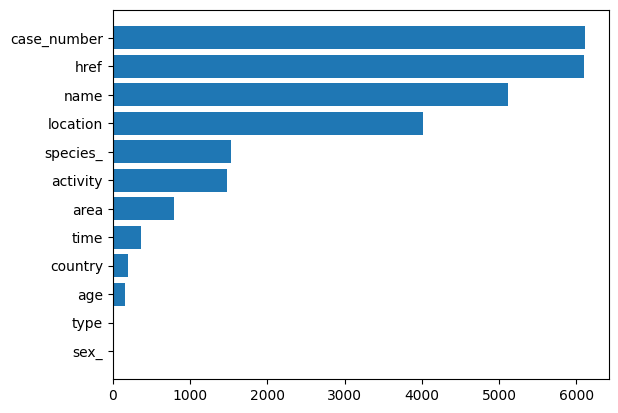

In [169]:
# iniciamos el marco de nuestra figura
plt.figure()

# establecemos como queremos nuestra figura
df_ordenado = df_cat.sort_values('cantidad')
plt.barh('nombre', 'cantidad', data=df_ordenado, color='tab:blue')
plt.show()


**4**. Filtrad los datos para quedarnos solo con los datos de USA.
- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

4.1 ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [170]:
# Identificamos las columnas 
df_ataques.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

In [171]:
# Aplicamos la condición y aplicamos shape para conocer el número de casos
df_ataques_usa=df_ataques[df_ataques["country"]=="USA"]
df_ataques_usa.shape

(2200, 13)

In [172]:
# Aplicamos la condición 2 y aplicamos shape para conocer el número de casos
df_ataques_usa_2000= df_ataques[(df_ataques["country"]=="USA") & (df_ataques["year"]>2000.00)]
df_ataques_usa_2000.shape

(959, 13)

In [173]:
# Aislamos los datos del número de casos
df_ataques_usa_2000.shape[0]

959

In [174]:
print(f"""Han habido {df_ataques_usa.shape[0]} ataques de tiburones en USA a lo largo del tiempo, 
 de los cuales {df_ataques_usa_2000.shape[0]} han ocurrido del año 2000 en adelante.""")

Han habido 2200 ataques de tiburones en USA a lo largo del tiempo, 
 de los cuales 959 han ocurrido del año 2000 en adelante.


- Muestra solo los que hayan ocurrido del 2000 en adelante.

In [175]:
x_us= df_ataques_usa_2000["year"].unique()
x_us

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.])

In [176]:
y_us=df_ataques_usa_2000["year"].value_counts()
y_us

2015.0    73
2007.0    66
2014.0    65
2017.0    65
2016.0    64
2012.0    63
2008.0    60
2013.0    59
2001.0    58
2003.0    57
2006.0    54
2005.0    52
2002.0    49
2011.0    48
2009.0    41
2010.0    40
2004.0    35
2018.0    10
Name: year, dtype: int64

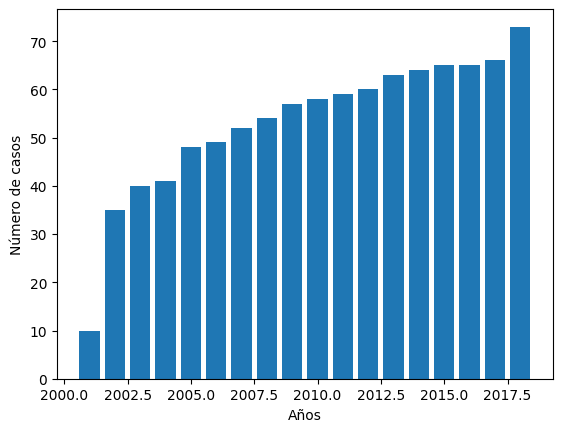

In [177]:
plt.figure()
plt.bar(x_us,y_us)
plt.xlabel("Años")
plt.ylabel("Número de casos")
plt.show()

4.2 En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [178]:
x_usa= df_ataques_usa["type"].unique()
x_usa

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Boat',
       'Sea Disaster'], dtype=object)

In [179]:
y_usa= df_ataques_usa["type"].value_counts()
y_usa

Unprovoked      1697
Provoked         205
Invalid          191
Boating           52
Sea Disaster      32
Boat              23
Name: type, dtype: int64

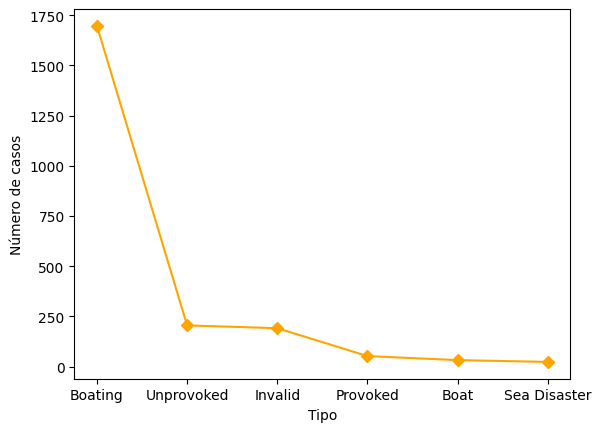

In [180]:
plt.figure()
plt.plot (x_usa , y_usa, marker="D", c="orange")
plt.xlabel("Tipo")
plt.ylabel("Número de casos")
plt.show()

**5.** Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

5.1 ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [181]:
# Aplicamos la condición y aplicamos shape para conocer el número de casos
df_ataques_es=df_ataques[df_ataques["country"]=="SPAIN"]
df_ataques_es.shape

(42, 13)

In [182]:
# Aplicamos la condición 2 y aplicamos shape para conocer el número de casos
df_ataques_es_2000= df_ataques[(df_ataques["country"]=="SPAIN") & (df_ataques["year"]>2000.00)]
df_ataques_es_2000.shape

(16, 13)

In [183]:
print(f"""Han habido {df_ataques_es.shape[0]} ataques de tiburones en España a lo largo del tiempo, 
 de los cuales {df_ataques_es_2000.shape[0]} han ocurrido del año 2000 en adelante.""")

Han habido 42 ataques de tiburones en España a lo largo del tiempo, 
 de los cuales 16 han ocurrido del año 2000 en adelante.


- Muestra solo los que hayan ocurrido del 2000 en adelante.

In [184]:
x_esp= df_ataques_es_2000["year"].unique()
x_esp

array([2017., 2016., 2015., 2014., 2013., 2010., 2009., 2006.])

In [185]:
y_esp= df_ataques_es_2000["year"].value_counts()
y_esp

2017.0    4
2014.0    4
2016.0    2
2015.0    2
2013.0    1
2010.0    1
2009.0    1
2006.0    1
Name: year, dtype: int64

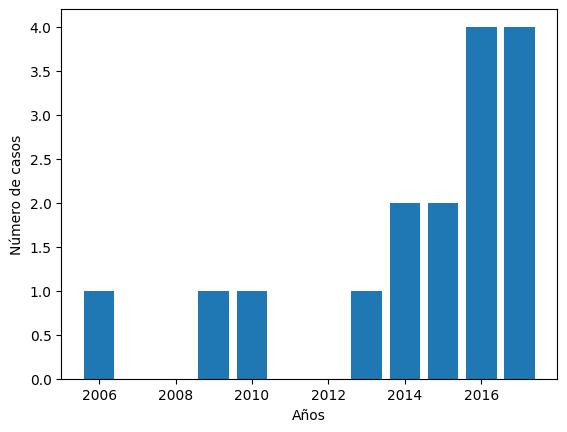

In [186]:
plt.figure()
plt.bar(x_esp,y_esp)
plt.xlabel("Años")
plt.ylabel("Número de casos")
plt.show()

5.2 En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [187]:
x= df_ataques_es["type"].unique()
x

array(['Unprovoked', 'Invalid', 'Provoked', 'Boating'], dtype=object)

In [188]:
y= df_ataques_es["type"].value_counts()
y

Unprovoked    26
Invalid       10
Provoked       5
Boating        1
Name: type, dtype: int64

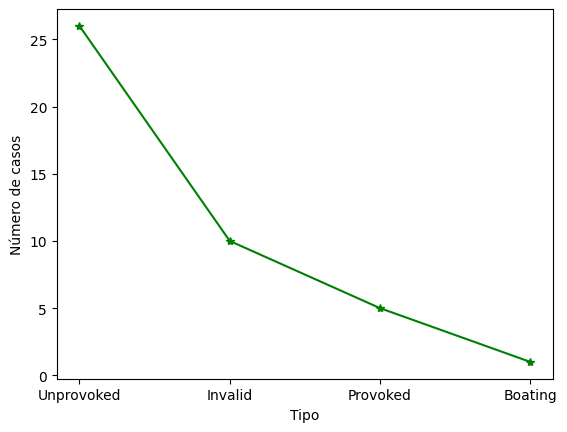

In [189]:
plt.figure()
plt.plot (x , y, marker="*", c="green")
plt.xlabel("Tipo")
plt.ylabel("Número de casos")
plt.show()